# N Step SARSA

## Environment FrozenLake-v1

The episode ends when you reach the goal or fall in a hole. You receive a reward of 1 if you reach the goal, and zero otherwise.

## Imports

In [1]:
import gym
import torch
import itertools

import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt

from agents import NStepSARSAAgent, ValueIterationAgent

from torch.utils.tensorboard import SummaryWriter
from tqdm.notebook import tqdm
from time import sleep

from collections import defaultdict

def rmse_fn(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

## Value Iteration Ground Truth

In [2]:
env_name = "FrozenLake8x8-v1"

env = gym.make(env_name)

agent = ValueIterationAgent(env, gamma=0.9)
agent.train()

gt_values = agent.values

## N Step SARSA RMSE

In [3]:
LEARNING_RATES = np.arange(0.1, 1.1, 0.1)
N_VALUES = [2, 4, 8, 16]
DISCOUNT_FACTOR = 0.99

In [4]:
env_name = "FrozenLake8x8-v1"

env = gym.make(env_name)

pbar = tqdm(list(itertools.product(LEARNING_RATES, N_VALUES)))
results = defaultdict(list)
rewards = []
for (lr, n) in pbar:
    rmses = []
    for i in range(20):
        agent = NStepSARSAAgent(env, n, DISCOUNT_FACTOR, lr)
        agent.train()
    
        values = np.max(agent.Q, axis=1)
        rmses.append(rmse_fn(values, gt_values))
    
    results[n].append((lr, np.mean(rmses)))

  0%|          | 0/40 [00:00<?, ?it/s]

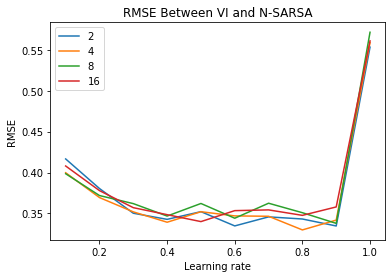

In [5]:
for n in N_VALUES:
    plt.plot(*zip(*results[n]), label=f"{n}")

plt.xlabel(f"Learning rate")
plt.ylabel("RMSE")    
plt.title("RMSE Between VI and N-SARSA")

plt.legend()
plt.show()

In [19]:
env_name = "FrozenLake8x8-v1"

env = gym.make(env_name)

pbar = tqdm(list(itertools.product(LEARNING_RATES, N_VALUES)))
rewards = defaultdict(list)
for (lr, n) in pbar:
    agent = NStepSARSAAgent(env, n, DISCOUNT_FACTOR, lr)
    rewards[n].append(agent.train())

  0%|          | 0/40 [00:00<?, ?it/s]

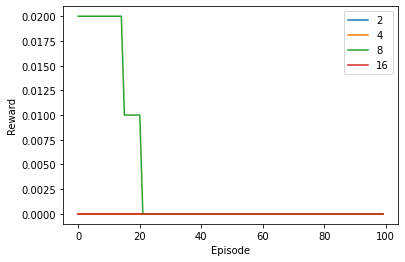

In [20]:
for n in N_VALUES:
    for r in rewards[n]:
        smoothed_rewards = []
        smooth_window = 50
        for i in range(smooth_window, len(r) - smooth_window):
            smoothed_rewards.append(np.mean(r[i-smooth_window:i+smooth_window]))
        
        plt.plot(smoothed_rewards, label=f"{n}")
        break

plt.xlabel(f"Episode")
plt.ylabel("Reward")    

plt.legend()
plt.show()

## Taxi v3

In [22]:
env_name = "Taxi-v3"

env = gym.make(env_name)

agent = ValueIterationAgent(env, gamma=0.9)
agent.train()

gt_values = agent.values

In [23]:
env_name = "Taxi-v3"

env = gym.make(env_name)

pbar = tqdm(list(itertools.product(LEARNING_RATES, N_VALUES)))
results = defaultdict(list)
rewards = []
for (lr, n) in pbar:
    rmses = []
    for i in range(1):
        agent = NStepSARSAAgent(env, n, DISCOUNT_FACTOR, lr)
        agent.train()
    
        values = np.max(agent.Q, axis=1)
        rmses.append(rmse_fn(values, gt_values))
    
    results[n].append((lr, np.mean(rmses)))

  0%|          | 0/40 [00:00<?, ?it/s]

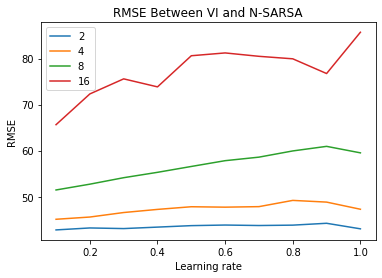

In [24]:
for n in N_VALUES:
    plt.plot(*zip(*results[n]), label=f"{n}")

plt.xlabel(f"Learning rate")
plt.ylabel("RMSE")    
plt.title("RMSE Between VI and N-SARSA")

plt.legend()
plt.show()

In [12]:
env_name = "Taxi-v3"

env = gym.make(env_name)

pbar = tqdm(list(itertools.product(LEARNING_RATES, N_VALUES)))
rewards = defaultdict(list)
for (lr, n) in pbar:
    agent = NStepSARSAAgent(env, n, DISCOUNT_FACTOR, lr)
    rewards[n].append(agent.train())

  0%|          | 0/40 [00:00<?, ?it/s]

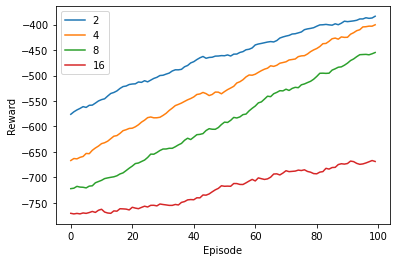

In [18]:
for n in N_VALUES:
    for r in rewards[n]:
        smoothed_rewards = []
        smooth_window = 50
        for i in range(smooth_window, len(r) - smooth_window):
            smoothed_rewards.append(np.mean(r[i-smooth_window:i+smooth_window]))
        
        plt.plot(smoothed_rewards, label=f"{n}")
        break

plt.xlabel(f"Episode")
plt.ylabel("Reward")    

plt.legend()
plt.show()